In [1]:
import mne 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path = '../MI/BCICIV_2b_gdf/'
file = 'B0101T.gdf'
raw = mne.io.read_raw_gdf(path+file)
raw.load_data()

Extracting EDF parameters from /Users/yuanxue/BCI/MI/BCICIV_2b_gdf/B0101T.gdf...
GDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 604802  =      0.000 ...  2419.208 secs...


/Users/yuanxue/anaconda3/lib/python3.6/site-packages/mne/io/edf/edf.py:1044: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, UINT8).tolist()[0]
<ipython-input-2-cc216c3ff77f>:3: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(path+file)


<RawGDF | B0101T.gdf, 6 x 604803 (2419.2 s), ~27.7 MB, data loaded>

In [3]:
custom_mapping1 = {'768': 9}
custom_mapping2 = {'769': 10}
custom_mapping3 = {'770': 11} # {'768': 9, '769': 10, '770': 11}
(events_from_annot1,event_dict1) = mne.events_from_annotations(raw, event_id=custom_mapping1)
(events_from_annot2,event_dict2) = mne.events_from_annotations(raw, event_id=custom_mapping2)
(events_from_annot3,event_dict3) = mne.events_from_annotations(raw, event_id=custom_mapping3)
print(event_dict1)

Used Annotations descriptions: ['768']
Used Annotations descriptions: ['769']
Used Annotations descriptions: ['770']
{'768': 9}


In [16]:
events_from_annot1

array([[ 55139,      0,      9],
       [ 57499,      0,      9],
       [ 62067,      0,      9],
       [ 64104,      0,      9],
       [ 72981,      0,      9],
       [ 75188,      0,      9],
       [ 77589,      0,      9],
       [ 88500,      0,      9],
       [ 90934,      0,      9],
       [ 93193,      0,      9],
       [ 99953,      0,      9],
       [107106,      0,      9],
       [109567,      0,      9],
       [112028,      0,      9],
       [116391,      0,      9],
       [121161,      0,      9],
       [123611,      0,      9],
       [132646,      0,      9],
       [139431,      0,      9],
       [141477,      0,      9],
       [144941,      0,      9],
       [147231,      0,      9],
       [149591,      0,      9],
       [156196,      0,      9],
       [160591,      0,      9],
       [165073,      0,      9],
       [169681,      0,      9],
       [171990,      0,      9],
       [176248,      0,      9],
       [178305,      0,      9],
       [18

In [17]:
event_dict1

{'768': 9}

In [19]:
d=dict(left=1,right=2)

In [20]:
d

{'left': 1, 'right': 2}

In [4]:
# fig = mne.viz.plot_events(events_from_annot, sfreq=raw.info['sfreq'],
#                           first_samp=raw.first_samp, event_id=event_dict)
# fig.subplots_adjust(right=0.7)

In [5]:
raw.drop_channels([ 'EOG:ch01', 'EOG:ch02', 'EOG:ch03'])

picks = mne.pick_types(raw.info, meg=False, eeg=True, stim=True, eog=False, exclude='bads')

In [6]:
raw.info

<Info | 7 non-empty values
 bads: []
 ch_names: EEG:C3, EEG:Cz, EEG:C4
 chs: 3 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: 2005-10-25 09:35:11 UTC
 nchan: 3
 projs: []
 sfreq: 250.0 Hz
>

In [7]:
raw.plot_sensors

<bound method plot_sensors of <RawGDF | B0101T.gdf, 3 x 604803 (2419.2 s), ~13.9 MB, data loaded>>

In [8]:
ch_names = ['C3', 'C4', 'Cz']
ch_types = ['eeg'] * 3
info = mne.create_info(ch_names, ch_types=ch_types, sfreq=250)
info.set_montage('standard_1020')

<Info | 8 non-empty values
 bads: []
 ch_names: C3, C4, Cz
 chs: 3 EEG
 custom_ref_applied: False
 dig: 6 items (3 Cardinal, 3 EEG)
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 3
 projs: []
 sfreq: 250.0 Hz
>

In [9]:
epochs1 = mne.Epochs(raw, events=events_from_annot1, event_id=event_dict1,tmin=-0.2,tmax=3,proj=True,baseline=(None, 0), preload=True)
epochs2 = mne.Epochs(raw, events=events_from_annot2, event_id=event_dict2,tmin=-0.2,tmax=3,proj=True,baseline=(None, 0), preload=True)
epochs3 = mne.Epochs(raw, events=events_from_annot3, event_id=event_dict3,tmin=-0.2,tmax=3,proj=True,baseline=(None, 0), preload=True)





Not setting metadata
Not setting metadata
120 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 120 events and 801 original time points ...
0 bad epochs dropped
Not setting metadata
Not setting metadata
60 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 60 events and 801 original time points ...
0 bad epochs dropped
Not setting metadata
Not setting metadata
60 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 60 events and 801 original time points ...
0 bad epochs dropped


In [10]:
epochs = mne.Epochs(raw, events=events_from_annot1, event_id=event_dict1,tmin=-0.2,tmax=0.5,proj=True,baseline=(None, 0), preload=True)

Not setting metadata
Not setting metadata
120 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 120 events and 176 original time points ...
0 bad epochs dropped


In [11]:
evoked = epochs.average()

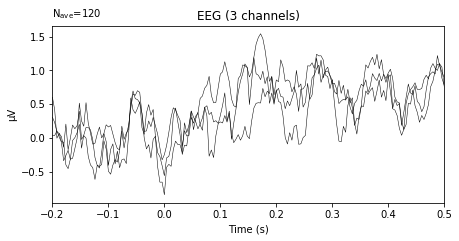

In [12]:
evoked.plot(time_unit='s')
plt.show()

In [13]:
epochs.get_montage

<bound method ContainsMixin.get_montage of <Epochs |  120 events (all good), -0.2 - 0.5 sec, baseline [-0.2, 0] sec, ~503 kB, data loaded,
 '768': 120>>

In [14]:
e1 = epochs1.get_data()
e2 = epochs2.get_data()
e3 = epochs3.get_data()
e1.shape

(120, 3, 801)

In [15]:
e1.reshape(801,3,120)

array([[[ 3.91743972e-06,  5.54099965e-06,  7.75050602e-06, ...,
          2.20232565e-06,  4.91843155e-06,  1.24711088e-06],
        [ 2.32134603e-06,  2.62042285e-06,  3.42304741e-06, ...,
         -1.59411899e-06, -9.56291878e-07,  6.64216247e-07],
        [ 6.82527074e-07,  1.08787850e-07, -4.35295015e-06, ...,
          1.58586117e-06, -1.03563879e-06, -2.63532284e-07]],

       [[-1.09362308e-06, -6.75525875e-07,  2.76690946e-06, ...,
         -1.48730584e-06, -3.06257545e-07, -1.45678780e-06],
        [ 6.45905421e-07, -8.95255791e-07,  3.55445451e-08, ...,
         -1.56054915e-06, -8.49478725e-07,  2.49224707e-06],
        [ 1.61637921e-06,  5.61119115e-06,  5.62950197e-06, ...,
         -1.34387103e-06, -6.81629484e-07, -3.12361154e-07]],

       [[-3.88656264e-07,  4.10916484e-07,  4.38382723e-07, ...,
         -6.06231964e-07,  3.03205741e-07,  1.05089781e-06],
        [-4.26175506e-07, -6.30646399e-07,  9.56291878e-07, ...,
         -5.21445658e-06, -5.13205786e-06, -5.620

In [90]:

for i in range (len(e1)):
    fig, ax = plt.subplots(5, 3)
    ax = ax.flatten()
    k=0

    for t in range(51,801):
#         evoked = np.mean(e1[i,:,t:t+50],1)
        im,cn = mne.viz.plot_topomap(e1[i,:], info, show=False,axes=ax[k])
        k=k+1
    
    clb = fig.colorbar(im, ax=[ax[0], ax[1], ax[2],ax[3], ax[4], ax[5],ax[6], ax[7], ax[8],ax[9], ax[10], ax[11],ax[12], ax[13], ax[4],], fraction=0.03, pad=0.05)
    clb.set_ticks(np.linspace(-0.00001,0.00001,10))
    plt.show()
    
    

SyntaxError: invalid syntax (<ipython-input-90-2642ee90e35f>, line 8)

In [91]:

for i in range (len(e1)):
    fig, ax = plt.subplots(10, 3)
    ax = ax.flatten()
    k=0

    for t in range(51,801,25):
        evoked = np.mean(e1[i,:,t:t+25],1)
        im,cn = mne.viz.plot_topomap(evoked, info, show=False,axes=ax[k])
        k=k+1
    
    clb = fig.colorbar(im, ax=[ax[0], ax[1], ax[2],ax[3], ax[4], ax[5],ax[6], ax[7], ax[8],ax[9], ax[10], ax[11],ax[12], ax[13], ax[14],ax[15], ax[16], ax[17],ax[18], ax[19], ax[20],ax[21], ax[22], ax[23],ax[24], ax[25], ax[26],ax[27], ax[28], ax[29]], fraction=0.03, pad=0.05)
    clb.set_ticks(np.linspace(-0.00001,0.00001,10))
    plt.show()
    
    

KeyboardInterrupt: 

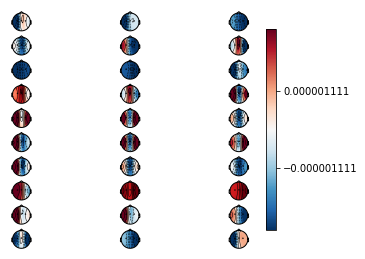

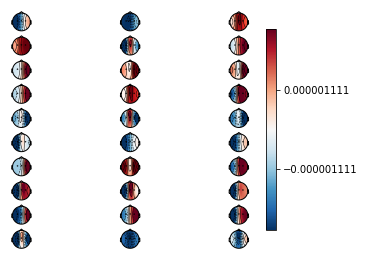

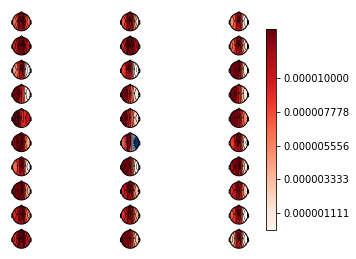

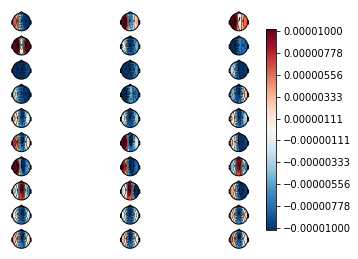

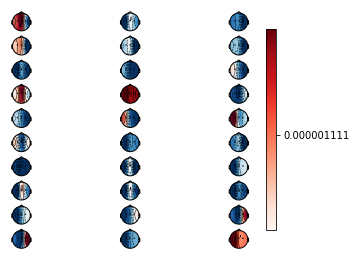

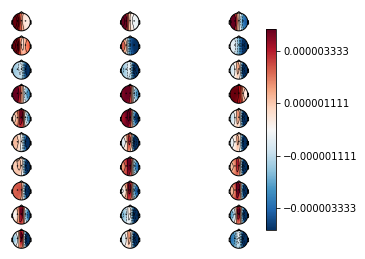

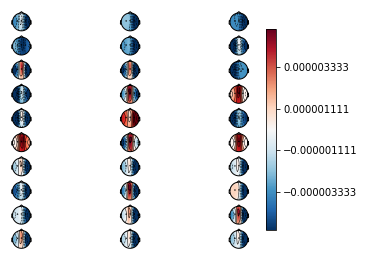

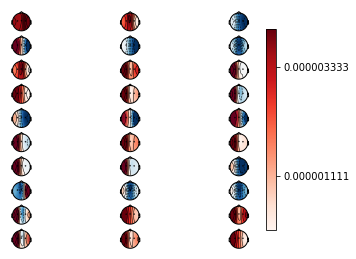

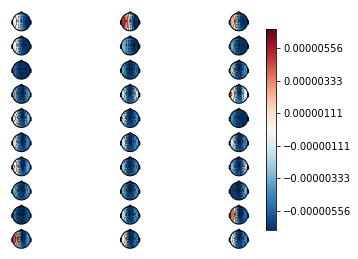

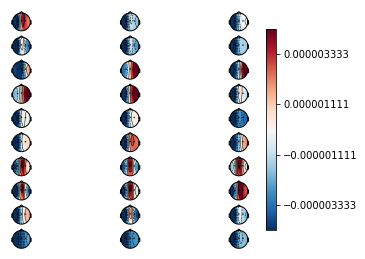

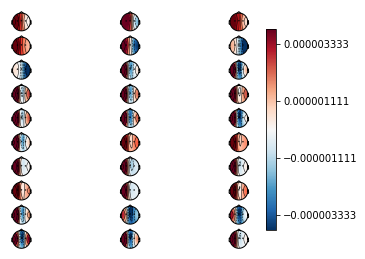

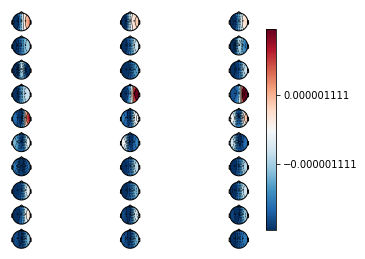

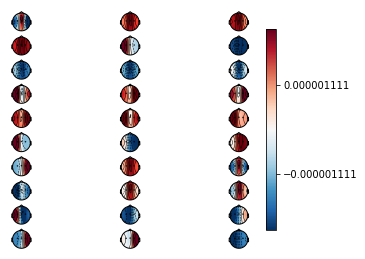

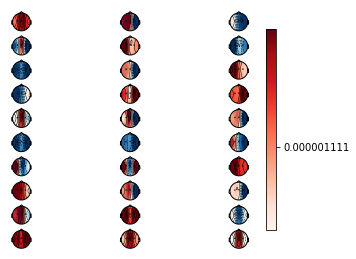

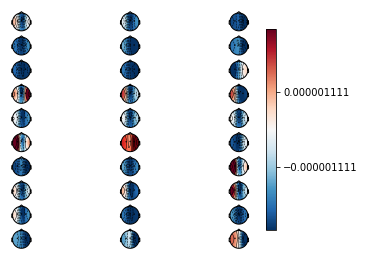

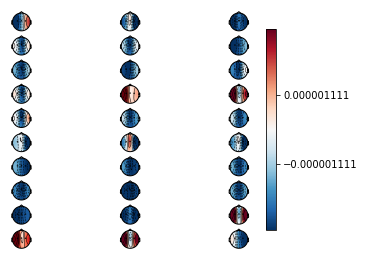

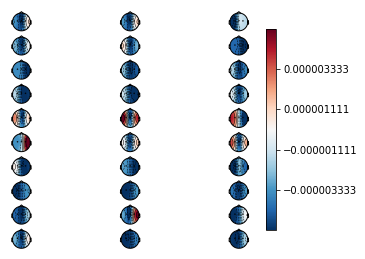

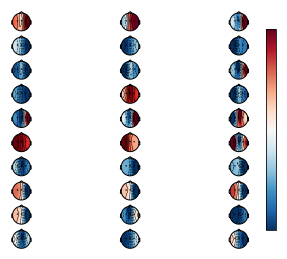

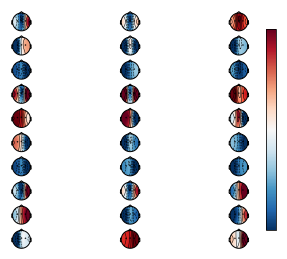

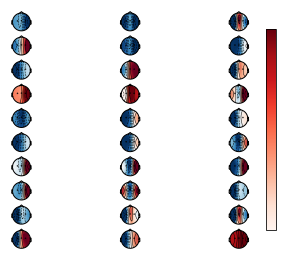

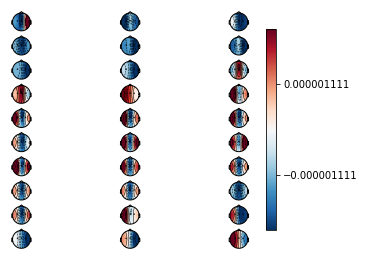

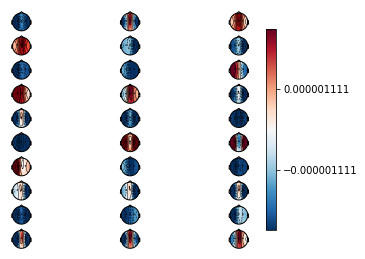

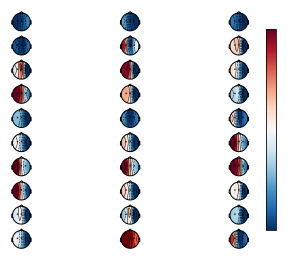

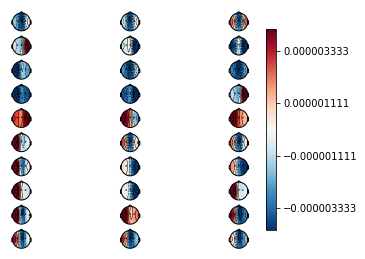

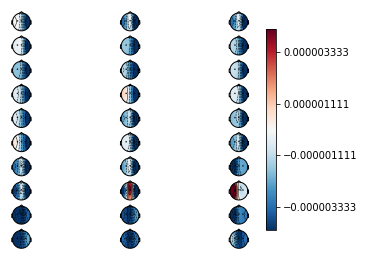

KeyboardInterrupt: 

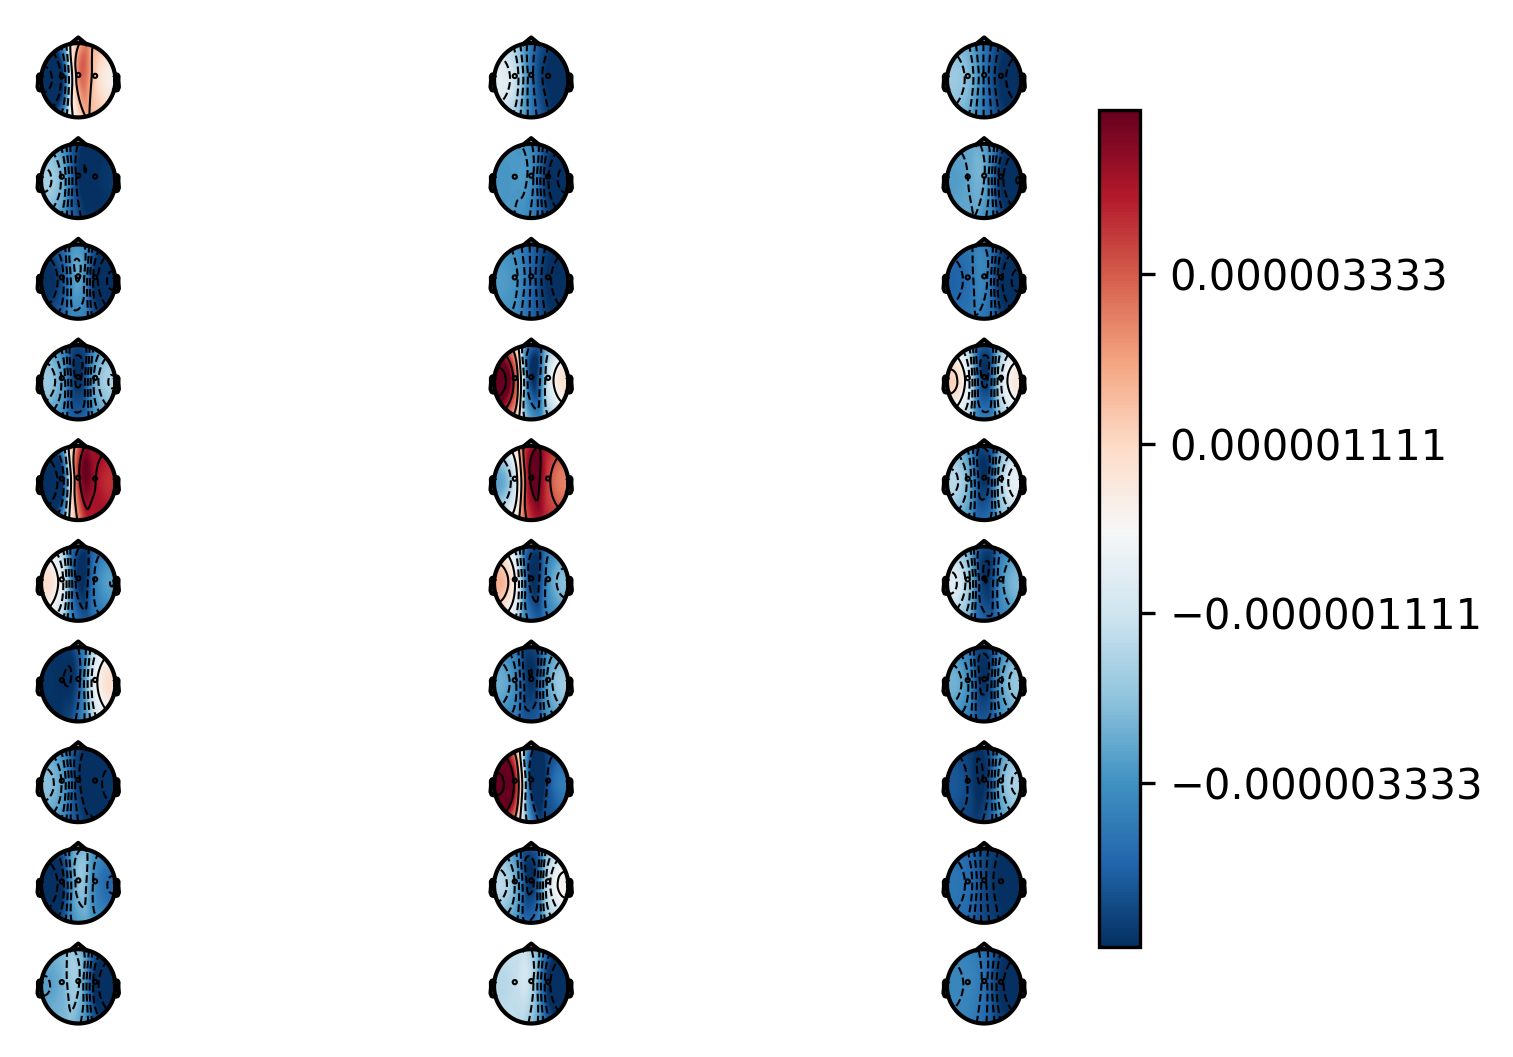

In [98]:

for i in range (len(e2)):
    fig, ax = plt.subplots(10, 3)
    ax = ax.flatten()
    k=0

    for t in range(51,801,25):
        evoked = np.mean(e2[i,:,t:t+25],1)
        im,cn = mne.viz.plot_topomap(evoked, info, show=False,axes=ax[k])
        k=k+1
    
    clb = fig.colorbar(im, ax=[ax[0], ax[1], ax[2],ax[3], ax[4], ax[5],ax[6], ax[7], ax[8],ax[9], ax[10], ax[11],ax[12], ax[13], ax[14],ax[15], ax[16], ax[17],ax[18], ax[19], ax[20],ax[21], ax[22], ax[23],ax[24], ax[25], ax[26],ax[27], ax[28], ax[29]], fraction=0.03, pad=0.05)
    clb.set_ticks(np.linspace(-0.00001,0.00001,10))
    plt.savefig('event'+str(i)+'.png', bbox_inches='tight',dpi=300)
    plt.show()
    
    

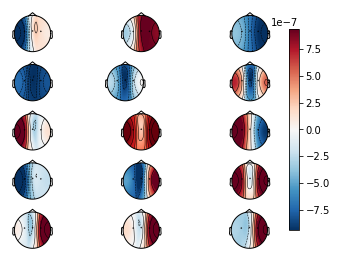

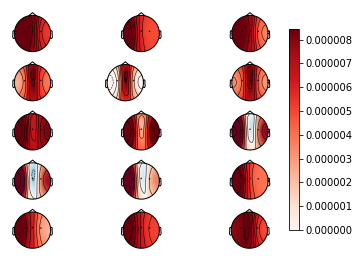

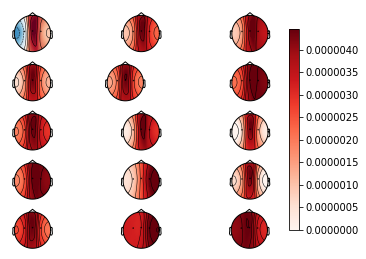

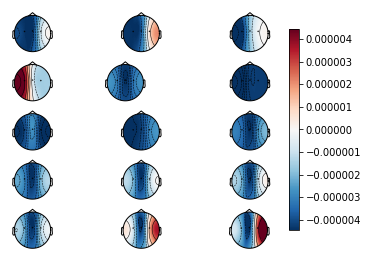

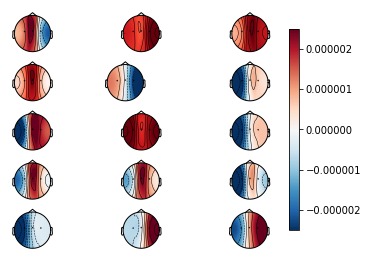

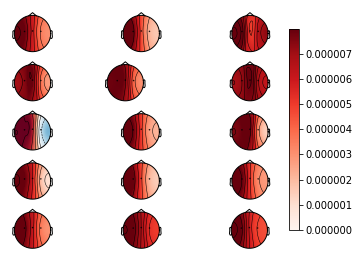

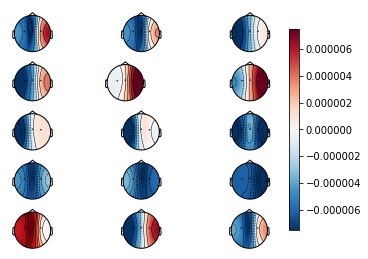

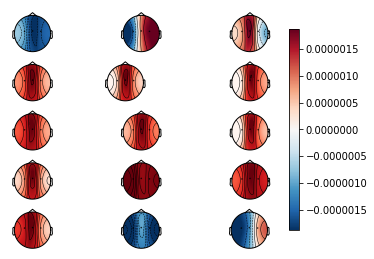

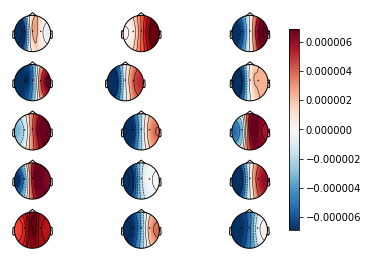

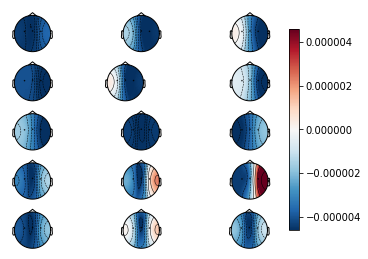

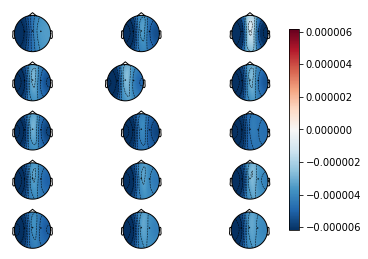

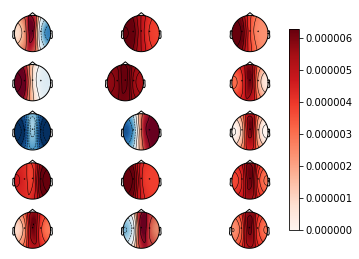

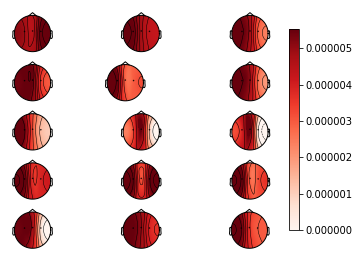

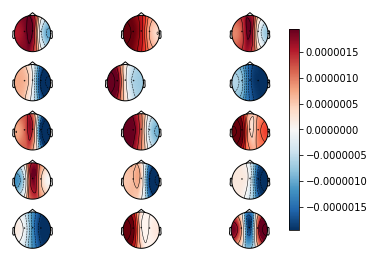

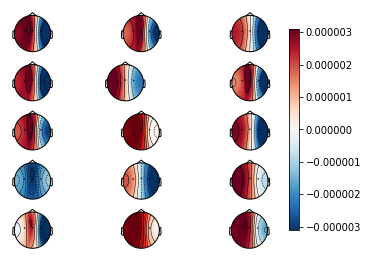

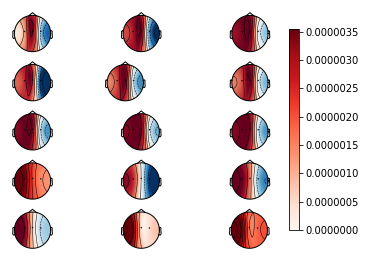

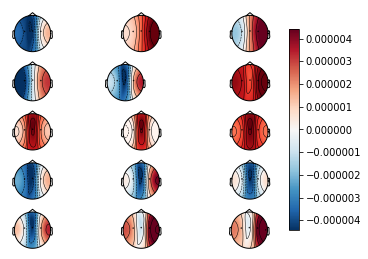

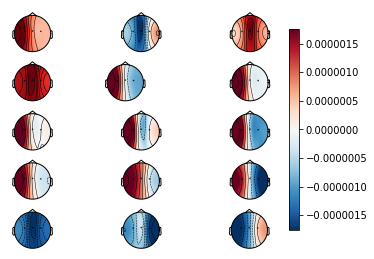

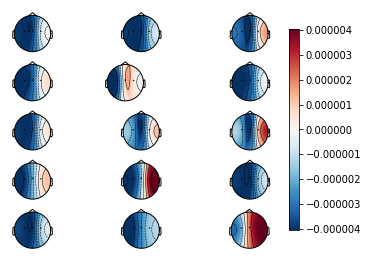

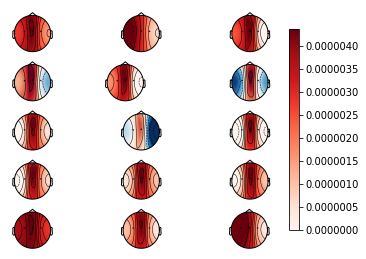

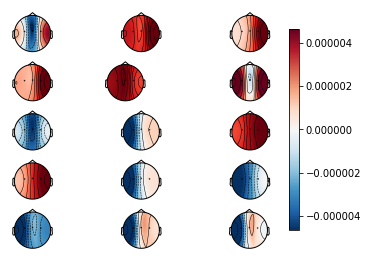

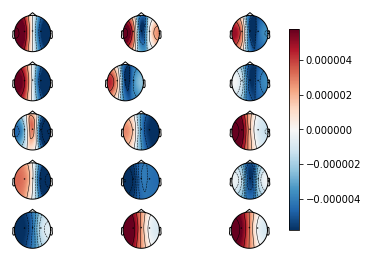

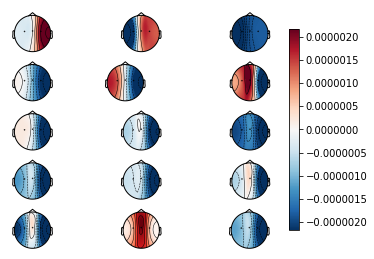

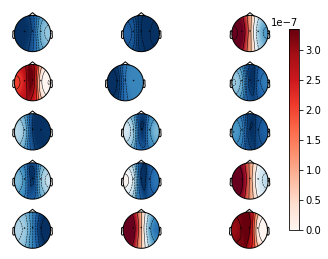

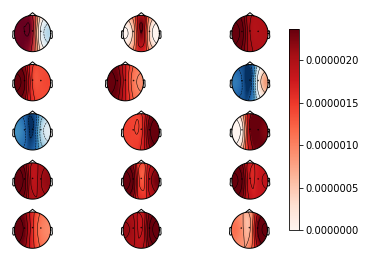

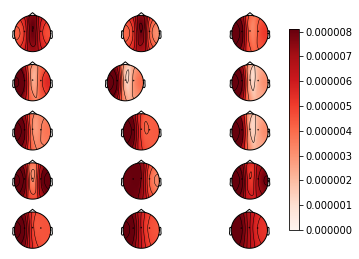

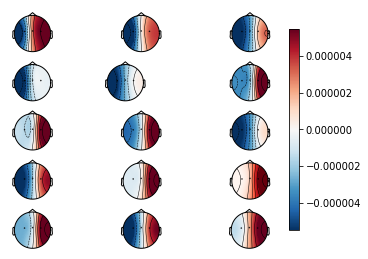

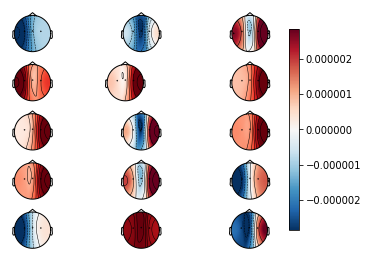

KeyboardInterrupt: 

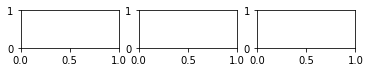

In [13]:

for i in range (len(e2)):
    fig, ax = plt.subplots(5, 3)
    ax = ax.flatten()
    k=0

    for t in range(51,801,50):
        evoked = np.mean(e1[i,:,t:t+50],1)
        im,cn = mne.viz.plot_topomap(evoked, info, show=False,axes=ax[k])
        k=k+1
    fig.colorbar(im, ax=[ax[0], ax[1], ax[2],ax[3], ax[4], ax[5],ax[6], ax[7], ax[8],ax[9], ax[10], ax[11],ax[12], ax[13], ax[4],], fraction=0.03, pad=0.05)
   
    plt.show()
    
    

In [ ]:

im, cn = mne.viz.plot_topomap(evoked1.data[:], info, show=False, axes=ax[0])
im, cn = mne.viz.plot_topomap(evoked2.data[:], info, show=False, axes=ax[1])
im, cn = mne.viz.plot_topomap(evoked3.data[:], info, show=False, axes=ax[2])

ax[0].set_title('a')
ax[1].set_title('left')
ax[2].set_title('right')


fig.colorbar(im, ax=[ax[0], ax[1], ax[2]], fraction=0.03, pad=0.05)
plt.savefig('pig.png', bbox_inches='tight')
plt.show()

# mne.viz.plot_topomap(evoked.data[:], info,show=False)

In [92]:
evoked1 = epochs1.average()
evoked2 = epochs2.average()
evoked3 = epochs3.average()

# evoked1.plot(time_unit='s')
# plt.show()



In [93]:
evoked

array([-9.47990970e-07,  9.03118675e-08, -5.75062869e-07])

In [73]:
evoked.data[:, 0]


TypeError: memoryview: invalid slice key

In [74]:
evoked.info

AttributeError: 'numpy.ndarray' object has no attribute 'info'

In [75]:
evoked.data[:, 0]

TypeError: memoryview: invalid slice key

In [76]:
evoked.info

AttributeError: 'numpy.ndarray' object has no attribute 'info'

In [77]:
evoked1.data.shape

(3, 801)

In [94]:
evoked1 = np.mean(evoked1.data,1)
evoked2 = np.mean(evoked2.data,1)
evoked3 = np.mean(evoked3.data,1)

In [95]:
evoked.shape

(3,)

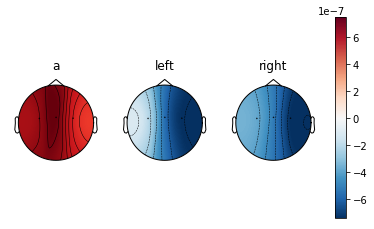

In [104]:
fig, ax = plt.subplots(1, 3)
ax = ax.flatten()

im, cn = mne.viz.plot_topomap(evoked1.data[:], info, show=False, axes=ax[0])
im, cn = mne.viz.plot_topomap(evoked2.data[:], info, show=False, axes=ax[1])
im, cn = mne.viz.plot_topomap(evoked3.data[:], info, show=False, axes=ax[2])

ax[0].set_title('a')
ax[1].set_title('left')
ax[2].set_title('right')


fig.colorbar(im, ax=[ax[0], ax[1],ax[2]], fraction=0.03, pad=0.05)
plt.savefig('pig.png', bbox_inches='tight')
plt.show()

# mne.viz.plot_topomap(evoked.data[:], info,show=False)

64
(64, 1)
<bound method ContainsMixin.get_montage of <Evoked | '' (average, N=1), [0, 0] sec, 64 ch, ~91 kB>>


(<matplotlib.image.AxesImage at 0x128aa9400>,
 <matplotlib.contour.QuadContourSet at 0x128961780>)

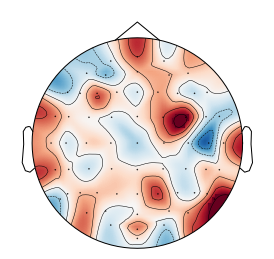

In [78]:
import mne
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
#设置通道名
biosemi_montage = mne.channels.make_standard_montage('biosemi64')
print(len(biosemi_montage.ch_names))
#生成数据
data = np.random.randn(64,1)
print(data.shape)
#创建info对象
info = mne.create_info(ch_names=biosemi_montage.ch_names, sfreq=250.,
                            ch_types='eeg')
#创建evokeds对象                       
evoked = mne.EvokedArray(data, info)
#evokeds设置通道
evoked.set_montage(biosemi_montage)
print(evoked.get_montage)
mne.viz.plot_topomap(evoked.data[:, 0], evoked.info,show=False)



In [135]:
len(evoked.data[:, 0])

64

In [80]:
biosemi_montage = mne.channels.make_standard_montage('standard_1020')
biosemi_montage.ch_names

['Fp1',
 'Fpz',
 'Fp2',
 'AF9',
 'AF7',
 'AF5',
 'AF3',
 'AF1',
 'AFz',
 'AF2',
 'AF4',
 'AF6',
 'AF8',
 'AF10',
 'F9',
 'F7',
 'F5',
 'F3',
 'F1',
 'Fz',
 'F2',
 'F4',
 'F6',
 'F8',
 'F10',
 'FT9',
 'FT7',
 'FC5',
 'FC3',
 'FC1',
 'FCz',
 'FC2',
 'FC4',
 'FC6',
 'FT8',
 'FT10',
 'T9',
 'T7',
 'C5',
 'C3',
 'C1',
 'Cz',
 'C2',
 'C4',
 'C6',
 'T8',
 'T10',
 'TP9',
 'TP7',
 'CP5',
 'CP3',
 'CP1',
 'CPz',
 'CP2',
 'CP4',
 'CP6',
 'TP8',
 'TP10',
 'P9',
 'P7',
 'P5',
 'P3',
 'P1',
 'Pz',
 'P2',
 'P4',
 'P6',
 'P8',
 'P10',
 'PO9',
 'PO7',
 'PO5',
 'PO3',
 'PO1',
 'POz',
 'PO2',
 'PO4',
 'PO6',
 'PO8',
 'PO10',
 'O1',
 'Oz',
 'O2',
 'O9',
 'Iz',
 'O10',
 'T3',
 'T5',
 'T4',
 'T6',
 'M1',
 'M2',
 'A1',
 'A2']